In [21]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)

## 1. Linear Regression

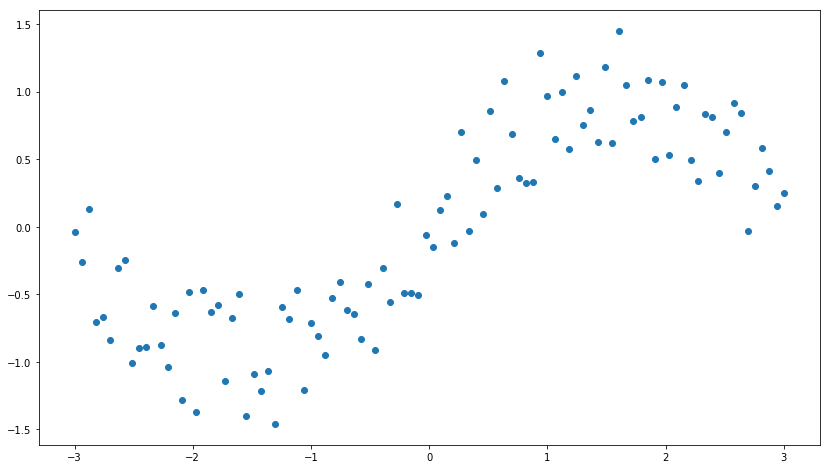

In [22]:
n_observations = 100
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys)
plt.show()

### 1.1 placeholder

In [23]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


### 1.2 init parameters/weights

In [24]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

### 1.3 predict

In [25]:
Y_pred = tf.add(tf.multiply(X, W), b)

### 1.4 loss function

In [26]:
loss = tf.square(Y - Y_pred, name='loss')

### 1.5 init optimizer

In [27]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 1.6 iter times, run graph

In [28]:
n_samples = xs.shape[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    for i in range(50):
        total_loss = 0
        for x, y in zip(xs, ys):
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        if i%5 == 0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
            
    writer.close()
    
    W, b = sess.run([W, b])
        

Epoch 0: [ 1.15103817]
Epoch 5: [ 0.18125546]
Epoch 10: [ 0.18125384]
Epoch 15: [ 0.18125384]
Epoch 20: [ 0.18125384]
Epoch 25: [ 0.18125384]
Epoch 30: [ 0.18125384]
Epoch 35: [ 0.18125384]
Epoch 40: [ 0.18125384]
Epoch 45: [ 0.18125384]


In [29]:
print(W, b)
print("W:" + str(W[0]))
print("b:" + str(b[0]))

(array([ 0.24138428], dtype=float32), array([-0.19265121], dtype=float32))
W:0.241384
b:-0.192651


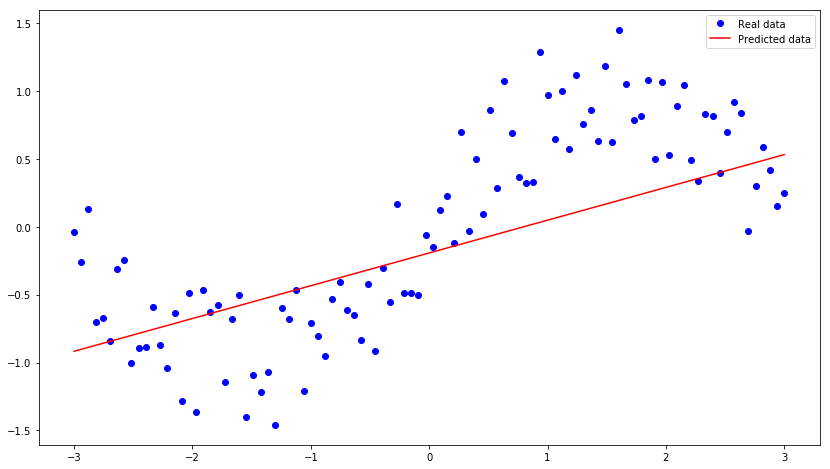

In [30]:
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs * W + b, 'r', label="Predicted data")
plt.legend()
plt.show()

## 2. polynomial regression

### 2.1 preparation

In [31]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

### 2.2 predict

In [32]:
Y_pred = tf.add(tf.multiply(X, W), b)
# add high order term
W_2 = tf.Variable(tf.random_normal([1]), name='weight_2')
Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W_2), Y_pred)
W_3 = tf.Variable(tf.random_normal([1]), name='weight_3')
Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W_3), Y_pred)

### 2.3 loss function

In [33]:
sample_num = xs.shape[0]
loss = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / sample_num

### 2.4 init optimizer

In [34]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 2.5 set step, run graph in session

In [35]:
n_samples = xs.shape[0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/polynomial_reg', sess.graph)
    # train model
    for i in range(1000):
        total_loss = 0
        for x, y in zip(xs, ys):
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        if i%20 == 0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
            
    # close writer
    writer.close()
    # get w and b
    W, W_2, W_3, b = sess.run([W, W_2, W_3, b])

Epoch 0: 0.645594925257
Epoch 20: 0.00463965618977
Epoch 40: 0.00344573755645
Epoch 60: 0.00264351447448
Epoch 80: 0.00209260285758
Epoch 100: 0.00171403925289
Epoch 120: 0.0014537369489
Epoch 140: 0.00127463192192
Epoch 160: 0.00115130982108
Epoch 180: 0.00106633031063
Epoch 200: 0.00100772626995
Epoch 220: 0.00096727629214
Epoch 240: 0.000939333170618
Epoch 260: 0.000920009103779
Epoch 280: 0.000906633436846
Epoch 300: 0.000897365532779
Epoch 320: 0.000890936428019
Epoch 340: 0.000886472140259
Epoch 360: 0.000883368768086
Epoch 380: 0.000881208515521
Epoch 400: 0.000879703120249
Epoch 420: 0.000878652700569
Epoch 440: 0.000877919169082
Epoch 460: 0.000877406391456
Epoch 480: 0.000877047461173
Epoch 500: 0.000876796189099
Epoch 520: 0.000876619994188
Epoch 540: 0.000876496612059
Epoch 560: 0.000876409728985
Epoch 580: 0.000876349075843
Epoch 600: 0.000876306697033
Epoch 620: 0.00087627723097
Epoch 640: 0.000876256671055
Epoch 660: 0.000876242414516
Epoch 680: 0.000876232615255
Epoch 7

In [36]:
print("W:" + str(W[0]))
print("W_2" + str(W_2[0]))
print("W_3" + str(W_3[0]))
print("b:" + str(b[0]))

W:0.81629
W_20.00837561
W_3-0.0868939
b:-0.0503441


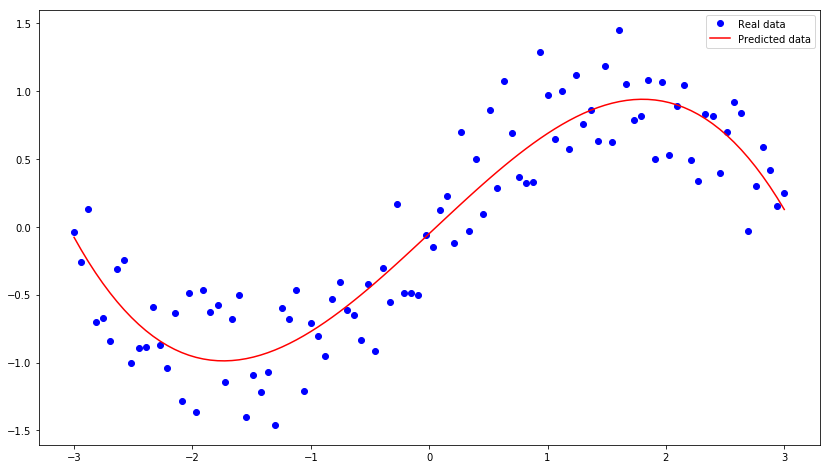

In [37]:
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs*W + np.power(xs, 2)*W_2 + np.power(xs, 3)*W_3 + b, 'r', label='Predicted data')
plt.legend()
plt.show()

# 3 logistic regression

### 3.1 env setup

In [48]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

### 3.2 read data 

In [49]:
# load MNIST data using tensorflow exmaple
mnist = input_data.read_data_sets('../../data/mnist', one_hot=True)

Extracting ../../data/mnist/train-images-idx3-ubyte.gz
Extracting ../../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../../data/mnist/t10k-labels-idx1-ubyte.gz


In [50]:
# data dimension
mnist.train.images.shape

(55000, 784)

In [51]:
# target dimension
mnist.train.labels.shape

(55000, 10)

### 3.3 placeholder

In [52]:
batch_size = 128
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder')
Y = tf.placeholder(tf.int32, [batch_size, 10], name='Y_placeholder')

### 3.4 prepare parameters / weights

In [53]:
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

### 3.5 score for every classes

In [54]:
logits = tf.matmul(X, w) + b

### 3.6 softmax loss function

In [55]:
# cross entropy
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
# average
loss = tf.reduce_mean(entropy)

### 3.7 prepare optimizer

In [56]:
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

### run graph

In [57]:
n_epochs = 30

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/logistic_reg', sess.graph)
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs):
        total_loss = 0
        
        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            total_loss += loss_batch
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
    
    print('Total time: {0} seconds'.format(time.time() - start_time))
    print('Optimization Finished!')
    
    # test model
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y: Y_batch})
        total_correct_preds += accuracy_batch[0]
    
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
    
    writer.close()

Average loss epoch 0: 0.367365764658
Average loss epoch 1: 0.294722591316
Average loss epoch 2: 0.287308622178
Average loss epoch 3: 0.280902574946
Average loss epoch 4: 0.275574352618
Average loss epoch 5: 0.27144936691
Average loss epoch 6: 0.26900642301
Average loss epoch 7: 0.269022485332
Average loss epoch 8: 0.263278221473
Average loss epoch 9: 0.266234838376
Average loss epoch 10: 0.262055453408
Average loss epoch 11: 0.265145198779
Average loss epoch 12: 0.259670551311
Average loss epoch 13: 0.259894964874
Average loss epoch 14: 0.260547572986
Average loss epoch 15: 0.260601828096
Average loss epoch 16: 0.259617707165
Average loss epoch 17: 0.256871099464
Average loss epoch 18: 0.256757222498
Average loss epoch 19: 0.257668225412
Average loss epoch 20: 0.253183712197
Average loss epoch 21: 0.257457826087
Average loss epoch 22: 0.25335201661
Average loss epoch 23: 0.253136817687
Average loss epoch 24: 0.255066193414
Average loss epoch 25: 0.254017641164
Average loss epoch 26: 0.

# 4 Multilayer perceptron

### 4.1 prepare placeholder and parameters weghts

In [61]:
X = tf.placeholder(tf.float32, [None, 784], name='X_placeholder')
Y = tf.placeholder(tf.int32, [None, 10], name='Y_placeholder')

# network parameters
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]), name='W')
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]), name='b2'),
    'out': tf.Variable(tf.random_normal([n_classes]), name='bias')
}

### 4.2 graph 

In [64]:
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'], name='fc_1')
    layer_1 = tf.nn.relu(layer_1, name='relu_1')
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'], name='fc_2')
    layer_2 = tf.nn.relu(layer_2, name='relu_2')
    
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'], name='fc_3')
    return out_layer

### 4.3 score

In [65]:
pred = multilayer_perceptron(X, weights, biases)

### 4.4 init optimizer

In [67]:
learning_rate = 0.001
loss_all = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y, name='cross_entropy_loss')
loss = tf.reduce_mean(loss_all, name='avg_loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

### 4.5 init

In [68]:
init = tf.global_variables_initializer()

###  4.6 graph

In [70]:
training_epochs = 40
batch_size = 128
display_step = 1

with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs/MLP_DNN', sess.graph)
    
    # train
    for epoch in range(training_epochs):
        avg_loss = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            _, l = sess.run([optimizer, loss], feed_dict={X: batch_x, Y: batch_y})
            avg_loss += l / total_batch
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                 "{:.9f}".format(avg_loss))
    
    print("Optimization Finished!")
    
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    writer.close()

('Epoch:', '0001', 'cost=', '227.013950046')
('Epoch:', '0002', 'cost=', '50.077457330')
('Epoch:', '0003', 'cost=', '30.796412895')
('Epoch:', '0004', 'cost=', '22.410393873')
('Epoch:', '0005', 'cost=', '16.728745484')
('Epoch:', '0006', 'cost=', '12.623265078')
('Epoch:', '0007', 'cost=', '9.496576793')
('Epoch:', '0008', 'cost=', '7.265858578')
('Epoch:', '0009', 'cost=', '5.686530019')
('Epoch:', '0010', 'cost=', '4.386338158')
('Epoch:', '0011', 'cost=', '3.442992140')
('Epoch:', '0012', 'cost=', '2.598286791')
('Epoch:', '0013', 'cost=', '1.943527542')
('Epoch:', '0014', 'cost=', '1.541981156')
('Epoch:', '0015', 'cost=', '1.251247087')
('Epoch:', '0016', 'cost=', '0.961976674')
('Epoch:', '0017', 'cost=', '0.657526681')
('Epoch:', '0018', 'cost=', '0.654715962')
('Epoch:', '0019', 'cost=', '0.538470910')
('Epoch:', '0020', 'cost=', '0.463247590')
('Epoch:', '0021', 'cost=', '0.434922591')
('Epoch:', '0022', 'cost=', '0.394629762')
('Epoch:', '0023', 'cost=', '0.277839427')
('Ep